In [0]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=1b7af82f6a79b1090bb5d14bb8dd6d49114ce9f382eac093bdcc83ba6d81571c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [0]:
import wget

url = 'https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip'
filename = wget.download(url)

In [0]:
filename

'rockpaperscissors.zip'

In [0]:
import zipfile

with zipfile.ZipFile('rockpaperscissors.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp')
    zip_ref.close()

In [53]:
import os

os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['README_rpc-cv-images.txt', 'scissors', 'paper', 'rock']

In [0]:
base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255, 
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='wrap',
        validation_split=0.2)

In [83]:
train_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        shuffle=True,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        base_dir,
        target_size=(150, 150),
        class_mode='categorical',
        subset='validation')

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


In [0]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [86]:
hist = model.fit(
                 train_generator,
                 steps_per_epoch=15, 
                 epochs=20,
                 validation_data=validation_generator, 
                 validation_steps=5,  
                 verbose=1)

Epoch 1/20
15/15 [==============================] - 17s 1s/step - loss: 0.6312 - accuracy: 0.3875 - val_loss: 0.5966 - val_accuracy: 0.4125
Epoch 2/20
15/15 [==============================] - 17s 1s/step - loss: 0.5052 - accuracy: 0.6208 - val_loss: 0.4493 - val_accuracy: 0.6812
Epoch 3/20
15/15 [==============================] - 17s 1s/step - loss: 0.3690 - accuracy: 0.7729 - val_loss: 0.2721 - val_accuracy: 0.8725
Epoch 4/20
15/15 [==============================] - 17s 1s/step - loss: 0.2513 - accuracy: 0.8769 - val_loss: 0.2328 - val_accuracy: 0.8813
Epoch 5/20
15/15 [==============================] - 17s 1s/step - loss: 0.2176 - accuracy: 0.8792 - val_loss: 0.2076 - val_accuracy: 0.9060
Epoch 6/20
15/15 [==============================] - 17s 1s/step - loss: 0.1571 - accuracy: 0.9271 - val_loss: 0.1642 - val_accuracy: 0.9125
Epoch 7/20
15/15 [==============================] - 17s 1s/step - loss: 0.2050 - accuracy: 0.9062 - val_loss: 0.1614 - val_accuracy: 0.9375
Epoch 8/20
15/15 [==

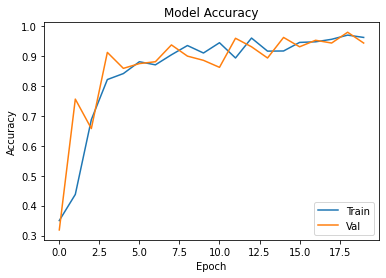

In [70]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

Saving 4QtEaLUAuzeJZKdK.png to 4QtEaLUAuzeJZKdK.png
4QtEaLUAuzeJZKdK.png
rock


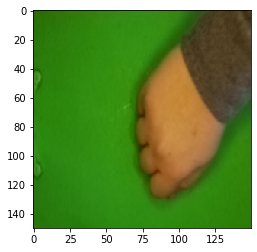

In [77]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for i in uploaded.keys():

    path = i
    img = image.load_img(path, target_size=(150,150))
    img_show = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
  
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    
    print(i)
    if classes[0][0]==1:
      print('paper')
    elif classes[0][1]==1:
      print('rock')
    elif classes[0][2]==1:
      print('scissors')
    else:
      print('invalid')